# Exploratory Data Analysis (EDA)

In this section we are going to explore the most significant characteristics of the dataset before any manipulation.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
data_red = pd.read_csv("../data/winequality-red.csv", sep=";")
data_white = pd.read_csv("../data/winequality-white.csv", sep=";")

# Add a column to distinguish the wine type
data_red["type"] = "red"
data_white["type"] = "white"

# Combine both datasets
data = pd.concat([data_red, data_white], ignore_index=True)

In [11]:
# Binary classification target
data["quality_label"] = (data["quality"] >= 6).astype(int)

In [27]:
# ========== Basic Info ========== #
print("🔍 Dataset shape:", data_red.shape)
print("🔍 Dataset shape:", data_white.shape)
print("🔍 Dataset shape:", data.shape)
print("🔍 Columns:", data.columns.tolist())
print("\n🧾 Data sample:\n", data.head())
print("\n📊 Class distribution:\n", data["quality_label"].value_counts(normalize=True))

# ========== Missing Values ========== #
print("\n🧼 Missing values per column:\n", data.isnull().sum())

# ========== Descriptive Statistics ========== #
print("\n📈 Descriptive statistics:\n", data.describe())

🔍 Dataset shape: (1599, 13)
🔍 Dataset shape: (4898, 13)
🔍 Dataset shape: (6497, 14)
🔍 Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type', 'quality_label']

🧾 Data sample:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20    

# Data Visualization

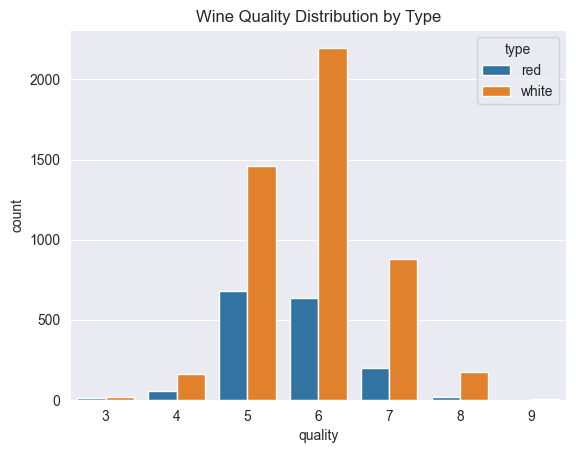

<Figure size 640x480 with 0 Axes>

In [22]:
# Quality distribution
sns.countplot(x="quality", data=data, hue="type")
plt.title("Wine Quality Distribution by Type")
plt.savefig("plots/quality_distribution.png")
plt.show()
plt.clf()

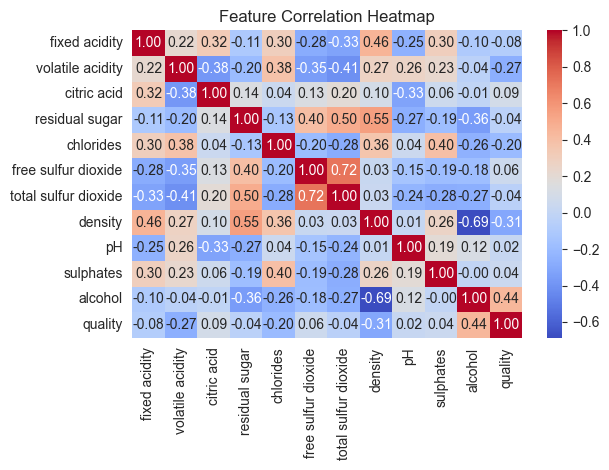

<Figure size 640x480 with 0 Axes>

In [23]:
# Correlation heatmap
corr = data.drop(columns=["quality_label", "type"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png")
plt.show()
plt.clf()

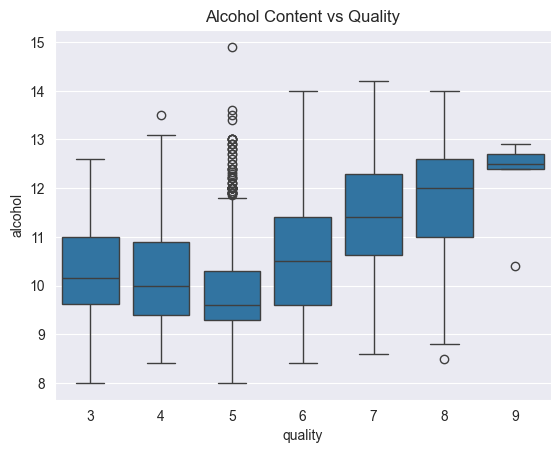

<Figure size 640x480 with 0 Axes>

In [24]:
# Alcohol vs Quality
sns.boxplot(x="quality", y="alcohol", data=data)
plt.title("Alcohol Content vs Quality")
plt.savefig("plots/alcohol_vs_quality.png")
plt.show()
plt.clf()

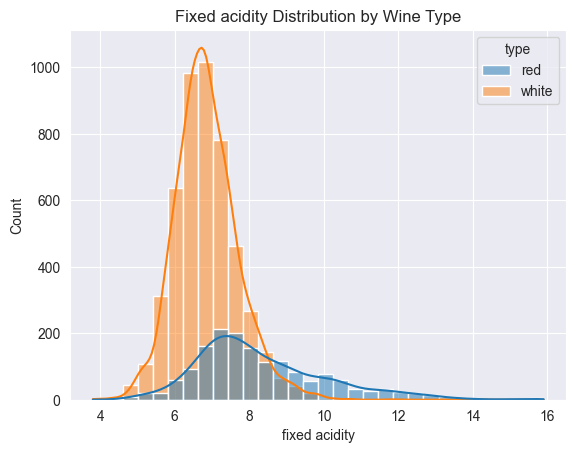

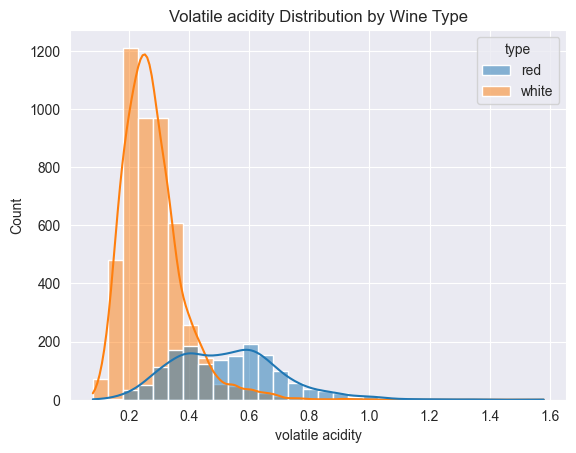

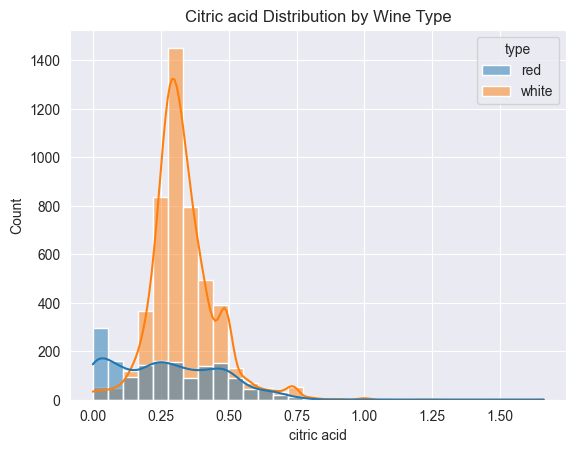

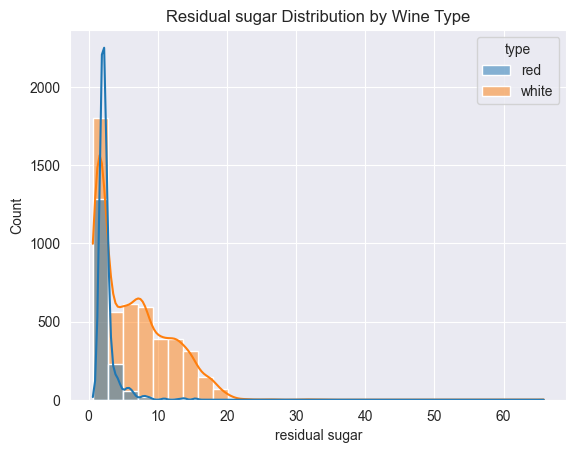

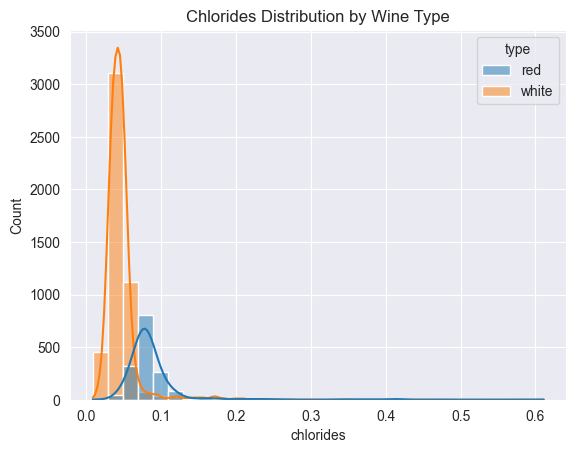

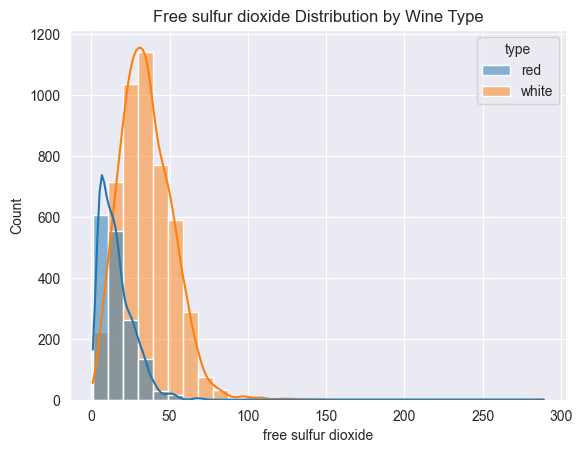

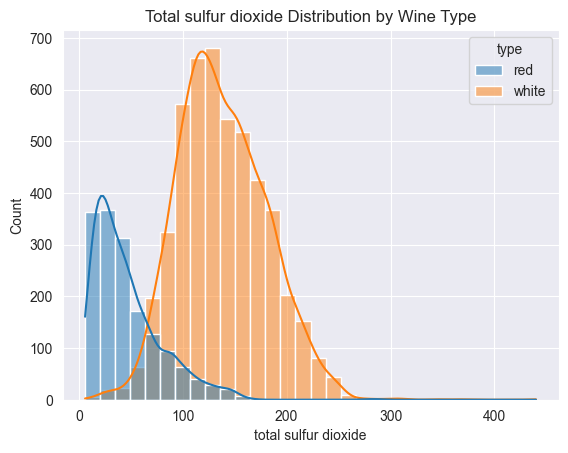

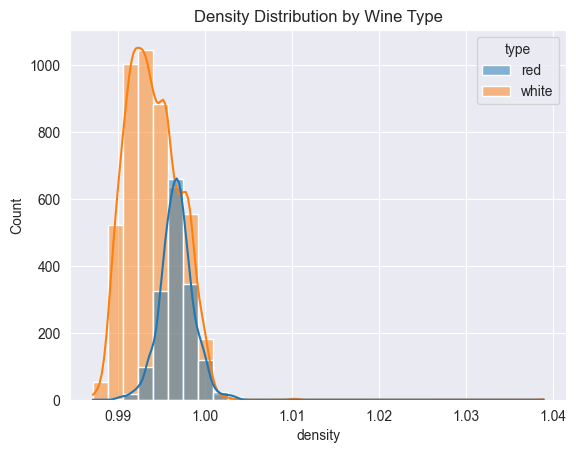

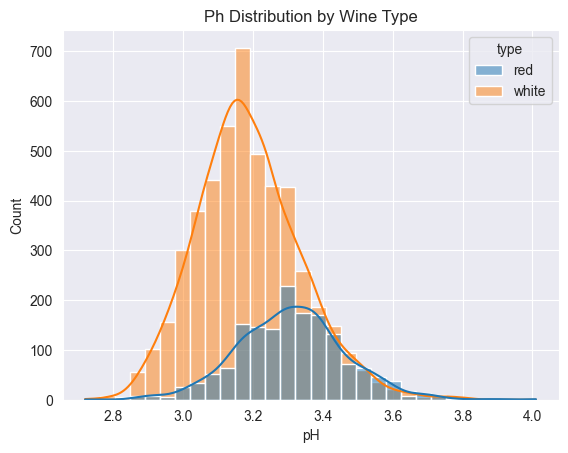

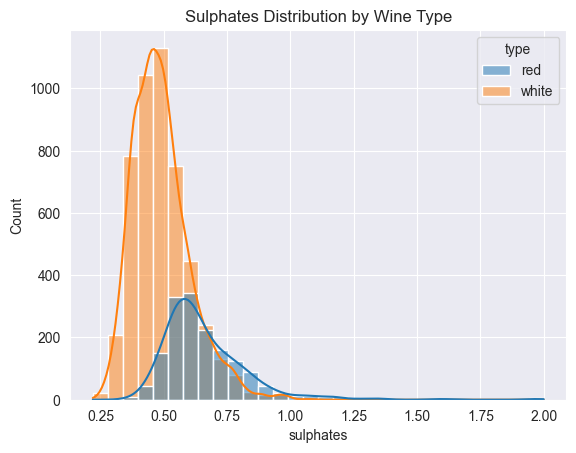

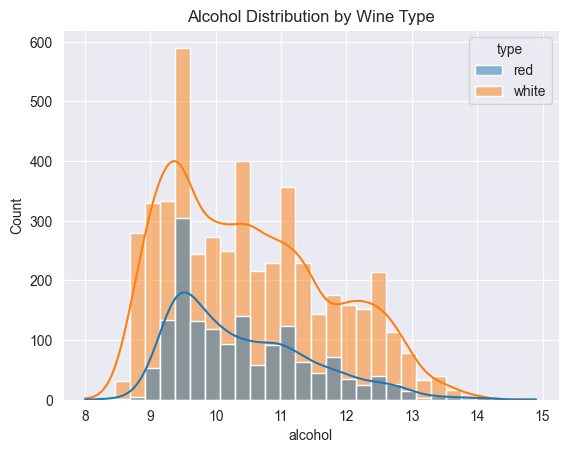

<Figure size 640x480 with 0 Axes>

In [25]:
# Distribution of features
features = data.columns[:-3]  # exclude 'quality', 'type', 'quality_label'
for col in features:
    sns.histplot(data, x=col, hue="type", kde=True, bins=30)
    plt.title(f"{col.capitalize()} Distribution by Wine Type")
    plt.savefig(f"plots/{col}_distribution.png")
    plt.show()
    plt.clf()

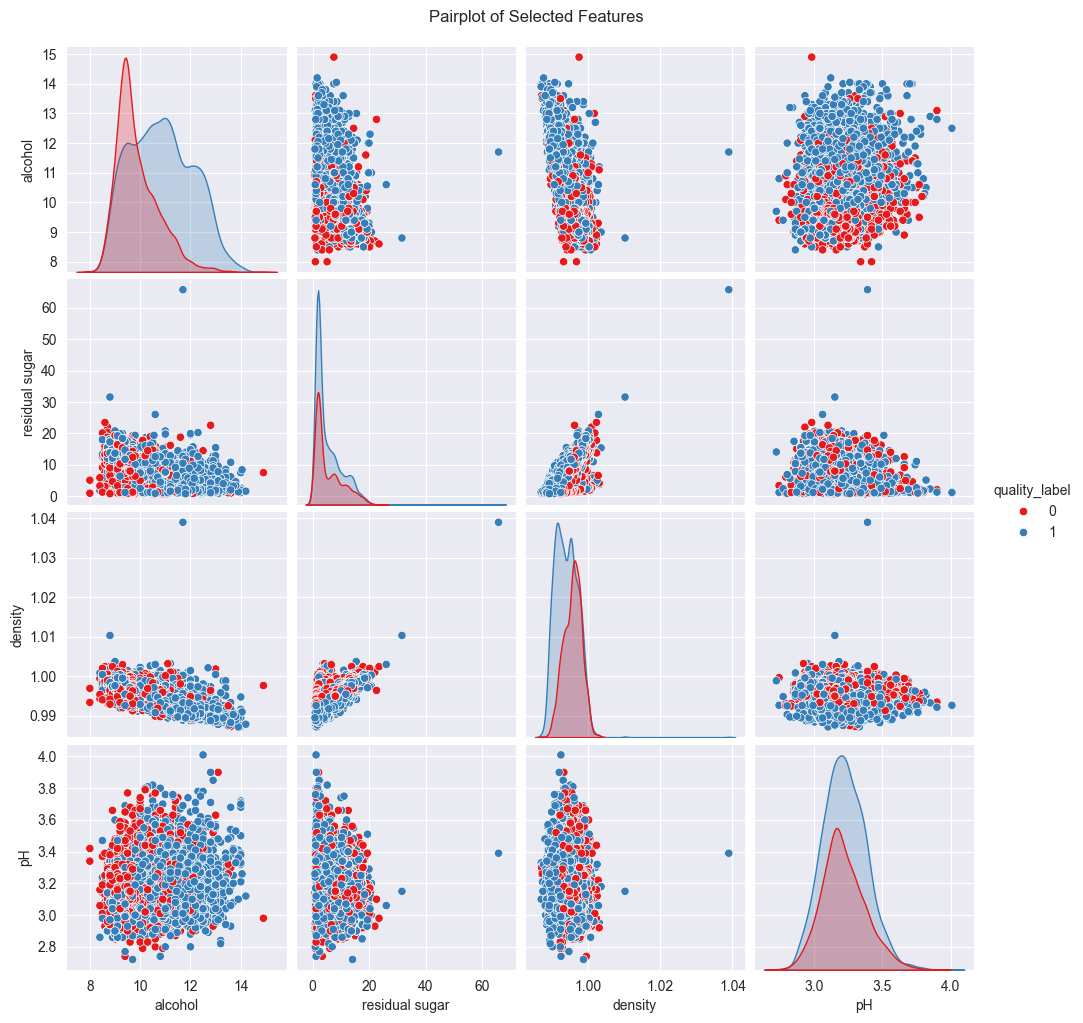

✅ EDA plots saved to plots/


<Figure size 640x480 with 0 Axes>

In [26]:
# 5. Pairplot of selected features
selected = ["alcohol", "residual sugar", "density", "pH", "quality_label"]
sns.pairplot(data[selected + ["type"]], hue="quality_label", palette="Set1", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.savefig("plots/pairplot_selected.png")
plt.show()
plt.clf()